# Análisis de resultados experimentales

### Lectura de datos

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

path_linear = 'Resultados/linear_kernel/'


#  Linear
linear_bootstrap = pd.read_csv(path_linear + 'bootstrap.csv', index_col=0, sep=";")


### Número de características vs. Número de cortes

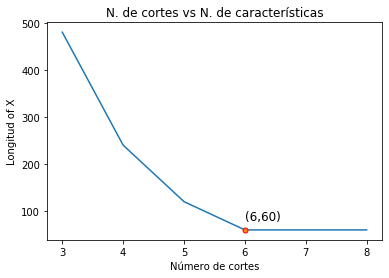

In [27]:
pairs = linear_bootstrap[['Number of cuts','Length of X']].copy()
pairs.drop_duplicates(inplace=True)


length_x = pairs['Length of X'].tolist()
number_of_cuts = pairs['Number of cuts'].tolist()

plt.plot(number_of_cuts,
         length_x)

plt.plot(6,60,marker="o", markersize=5, markeredgecolor="red")

plt.text(6, 80, '(6,60)', fontsize=12)
plt.title("N. de cortes vs N. de características")
plt.xlabel("Número de cortes")
plt.ylabel("Longitud of X")
plt.show()

# Linear kernel

## Bootstrap

#### Matriz de correlaciones entre datos experimentales

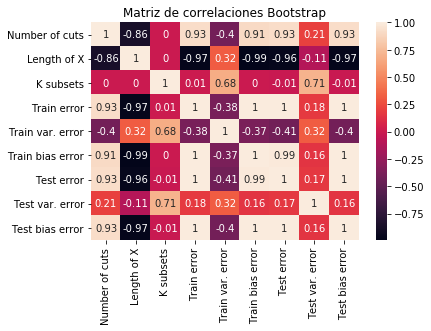

In [28]:
corrMatrix= linear_bootstrap.corr()
corrMatrix = corrMatrix.round(2)
sn.heatmap(corrMatrix, annot=True)
plt.title("Matriz de correlaciones Bootstrap")
plt.show()

### Número de subsets vs. Error

#### Training

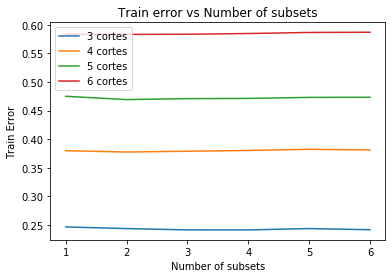

In [29]:
number_of_cuts = range(3,7,1)
number_of_cuts

for cut in number_of_cuts:
    filtered_data = linear_bootstrap[(linear_bootstrap['Number of cuts'] == cut)]
    plt.plot(filtered_data['K subsets'],filtered_data['Train error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Train error vs Number of subsets")
plt.xlabel("Number of subsets")
plt.ylabel("Train Error")
plt.show()

#### Test

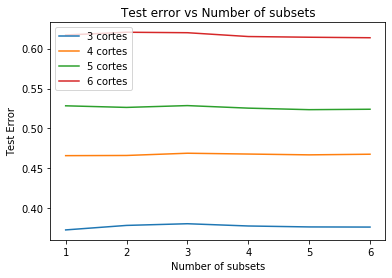

In [30]:
number_of_cuts = range(3,7,1)


for cut in number_of_cuts:
    filtered_data = linear_bootstrap[(linear_bootstrap['Number of cuts'] == cut)]
    plt.plot(filtered_data['K subsets'],filtered_data['Test error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test error vs Number of subsets")
plt.xlabel("Number of subsets")
plt.ylabel("Test Error")
plt.show()

### Número de cortes vs. Error

#### Training

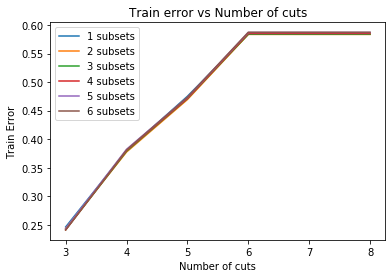

In [31]:
k_subsets = linear_bootstrap['K subsets'].unique()
k_subsets

for k_subset in k_subsets:
    filtered_data = linear_bootstrap[(linear_bootstrap['K subsets'] == k_subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train error'], label = f'{k_subset} subsets')
    
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Train error vs Number of cuts")
plt.ylabel("Train Error")
plt.show()

### Test

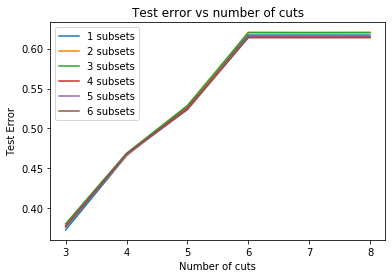

In [32]:
k_subsets = linear_bootstrap['K subsets'].unique()
k_subsets


for k_subset in k_subsets:
    filtered_data = linear_bootstrap[(linear_bootstrap['K subsets'] == k_subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test error'], label = f'{k_subset} subsets')
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Test error vs number of cuts")
plt.ylabel("Test Error")
plt.show()

### Número de subsets vs. Varianza

#### Training

### Número de cortes vs. Bias

#### Training

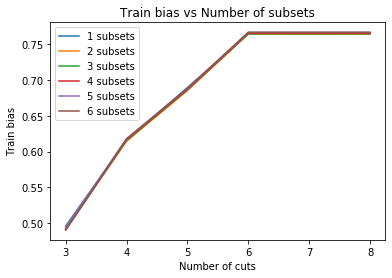

In [33]:
k_subsets = linear_bootstrap['K subsets'].unique()


for subset in k_subsets:
    filtered_data = linear_bootstrap[(linear_bootstrap['K subsets'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train bias error'], label = f'{subset} subsets')
    
plt.legend(loc="upper left")
plt.title("Train bias vs Number of subsets")
plt.xlabel("Number of cuts")
plt.ylabel("Train bias")
plt.show()

#### Test

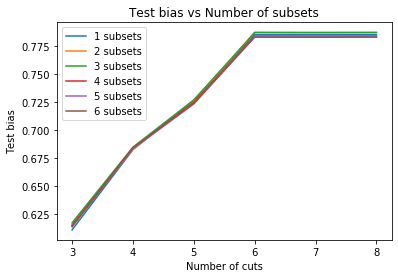

In [34]:
k_subsets = linear_bootstrap['K subsets'].unique()


for subset in k_subsets:
    filtered_data = linear_bootstrap[(linear_bootstrap['K subsets'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test bias error'], label = f'{subset} subsets')
    
plt.legend(loc="upper left")
plt.title("Test bias vs Number of subsets")
plt.xlabel("Number of cuts")
plt.ylabel("Test bias")
plt.show()

### Selección mayor y peor error

In [35]:
linear_bootstrap.sort_values(by='Test bias error', ascending = True, inplace = True)
linear_bootstrap.head(10)


mejor_modelo_tradeoff = linear_bootstrap.iloc[0]
#eleccion en base de la mayor varianza dentro del top 10 menores bias. Buen trade-off

linear_bootstrap.sort_values(by='Test bias error', ascending = False, inplace = True)
linear_bootstrap.head(10)

peor_modelo_tradeoff = linear_bootstrap.iloc[6]
# #eleccion en base de la menor varianza dentro del top 10 mayores bias. Pesimo trade-off

